In [1]:
##### IMPORTS ####
import random, requests, os, matplotlib.pyplot as plt, cryptography_functions

### LET USER INPUT TEXT FILE NAME ####

In [2]:
#### FINDING FILE IN DIRECTORY ####

def find_file():
    in_directory = False

    while in_directory == False:
        file_name = input("Input the name of the text file you would like to encrypt / decrypt, including the .txt: ")
        if os.path.isfile(file_name):
            in_directory = True
        else:
            print("")
            print("The file you inputted is not in the directory, try again")
          
    return file_name

In [3]:
#### CASESAR CYPHER ##### (maintains case of characters)

def caesar_encrypt(): #defines the caesar encryption function
    
    file_name = find_file()

    input_text = open(file_name,"r") #opens the text file we want to read
    message = input_text.read() #reads the text file to the variable message
    
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    
    shift_value_file = open("_caesar_shift_value.txt","w")
    shift_value = random.randint(1,26) #generates a shift value between 1 and 26 inclusive
    
    encrypted_message = []
    
    for character in message: #iterates character through each element of the message
        if character.isalpha(): #checks to see if the character is in the alphabet
            
            if character.isupper(): #checks to see if character is uppercase
                offset = 65 #sets appropriate offset value
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25

            encrypted_message.append(chr((character_offset+shift_value)%26+offset))
            #appends our changed letter to the encrypted message list
    

    final_text = "".join(encrypted_message) #turns the list into a string
    encrypted_text.write(final_text) #writes the string to the text file
    shift_value_file.write(str(shift_value))
    shift_value_file.close()
    encrypted_text.close()
    print("")
    print("Encrypted message written to encrypted_text.txt")
    input_text.close() #closes the files
    
    return 


In [4]:
def caesar_decrypt(): #needs a shift value to decrypt 
    
    file_name = find_file() #lets the user input the file name they would like to read
    
    shift_value_file = open("_caesar_shift_value.txt","r") #opens the shift value file
    shift_value = int(shift_value_file.read()) #read the integer value stored there
    
    encrypted_text = open(file_name,"r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to    

    decrypted_message = []
       
    for character in cryptic: #iterates each character in the cryptic text
        if character.isalpha(): #checks if character is in alphabet
            
            if character.isupper(): #checks if character is uppercase
                offset = 65 #sets appropriate offset
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25
            
            decrypted_message.append(chr((character_offset-shift_value)%26+offset))
            #appends decrypted character to decrypted message list
    
    
        
    final_text = "".join(decrypted_message) #changes the list into a string
    decrypted_text.write(final_text) #writes the string to the text file
    
    decrypted_text.close()  
    encrypted_text.close()#closes the files
    print("")
    print("Decrypted message written to decrypted_text.txt")
    
    return 

In [5]:
#caesar_encrypt()

In [6]:
#caesar_decrypt()

In [7]:
#### VIGENERE CYPHER ####
def vigenere_encrypt():
    
    file_name = find_file()
    
    input_text = open(file_name,"r") #opens the text file we want to read
    message_list_unfiltered = list(input_text.read()) #reads the text file to the variable message
    message_list = [x for x in message_list_unfiltered if x.isalpha()] #makes a list of only alphabetical characters
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    key_file = open("_vigenere_key.txt","w")
   
    
    encrypted_message = []
    key_length = random.randint(129,384) #generates a random length for our keyword
    
    key_list = [random.randint(0,25) for x in range(0,key_length)] #generates a list for our keyword in ASCII
    
    for i in range(0,len(message_list)):

        key_pos =  i%len(key_list) #generates position of where we are in the key
        

        character = message_list[i] #sets character to message character for ease
        if character.isupper(): #checks if y is uppercase in the alphabet
            offset = 65 #sets ASCII offsets
        else: offset = 97

        character_offset = ord(character) - offset #offsets character to be within 0 and 25

        character_encrypted = (character_offset+key_list[key_pos])%26 + offset #encrypts the character 

        encrypted_message.append(chr(character_encrypted)) #appends encrypted character to encrypted message
       
    final_text = "".join(encrypted_message)
    encrypted_text.write(final_text) #writes the final encrypted message to the file
    
    key = "".join(chr(m+65) for m in key_list) #turns keylist into a string
    key_file.write(key) #writes the key to the file
    
    
    encrypted_text.close()
    input_text.close() #closes the files
    key_file.close()
    
    print("Encrypted text written to encrypted_text.txt, and vigenere key written to _vigenere_key.txt")
    
    return      

In [8]:
def vigenere_decrypt():
    
    file_name = find_file()
    
    key_file = open("_vigenere_key.txt","r") #opens file with key in it to read
    key = key_file.read() #reads the file to key
    key_list = [ord(m) - 65 for m in key] #offsets all values of key to be between 0 and 25
    
    encrypted_text = open(file_name,"r") #opens encrypted text file to read
    cryptic = encrypted_text.read() #reads the file to cryptic
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to
    decrypted_message = [] #creates decrypted message list
  
    for i in range(0,len(cryptic)): #iterates through the encrypted message
        character = cryptic[i] #sets character to the current character
        key_pos = i%len(key_list) #sets our position within the key 
        
        if character.isupper(): #checks to see if the character is uppercase
            offset = 65 #sets appropriate offset value
        else:
            offset = 97
            
        character_offset = ord(character)-offset #offsets character to be between 0 and 25
        
        character_decrypted = (character_offset-key_list[key_pos])%26 + offset
        #decrypts the character using the keyword
        
        decrypted_message.append(chr(character_decrypted)) #appends character to decrypted message
        
    final_text = "".join(decrypted_message) #turns decrypted message into a string
    decrypted_text.write(final_text) #writes this string to the decrypted text file
    
    decrypted_text.close() #closes the files
    encrypted_text.close()
    key_file.close()
    return
    
    
    

In [9]:
#vigenere_encrypt()

In [10]:
#vigenere_decrypt()

In [11]:
#### URL TEXT EXTRACTING ####
def url_to_text_utf8(url):  #### Sourced code from the GitHub repo provided for this project
    '''
    Given a url for a text that is 
    'utf-8' encoded this function 
    returns that text.
    '''
    response = requests.get(url) #gets the URL of the text file
    response.encoding = 'utf-8-sig' #encodes the text file
    return response.text #returns the text file
           
def get_large_text():        
    wonderland = url_to_text_utf8("https://gutenberg.org/cache/epub/11/pg11.txt")[1490:148820]
    gatsby = url_to_text_utf8("https://gutenberg.org/cache/epub/64317/pg64317.txt")[1497:278020]
    dracula = url_to_text_utf8("https://gutenberg.org/cache/epub/345/pg345.txt")[3130:860610]
    moby = url_to_text_utf8("https://gutenberg.org/cache/epub/2701/pg2701.txt")[6000:1241690]
    frankenstein = url_to_text_utf8("https://gutenberg.org/cache/epub/84/pg84.txt")[1440:427680]
    #creates large strings of texts from english books for analysis later

    text = wonderland + gatsby + dracula + moby + frankenstein
    return text

    #text gives us approximately 3 million characters to analyse (not all may be alphabet though most all are)


In [12]:
def frequency_finder(text):
    descending_frequencies = open("decsending_frequent_letters.txt","w")
    counts = {chr(x):0 for x in range(65,91)} #creates a dictionary of all the letters in the alphabet with value 0
    text = text.upper() #makes all text uppercase
    for character in text: #iterates through all the elements of the string "text"
        if character in counts: #checks if the element is an alphabet letter
            counts[character]+=1 #ups the count by one for each letter
    sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1],reverse=True)) #sorts the dictionary by value
    frequency = [x for x in sorted_counts] #creates an ordered list of the letters in decreasing frequency
    descending_frequencies.write("".join(frequency))
    descending_frequencies.close()
    return frequency

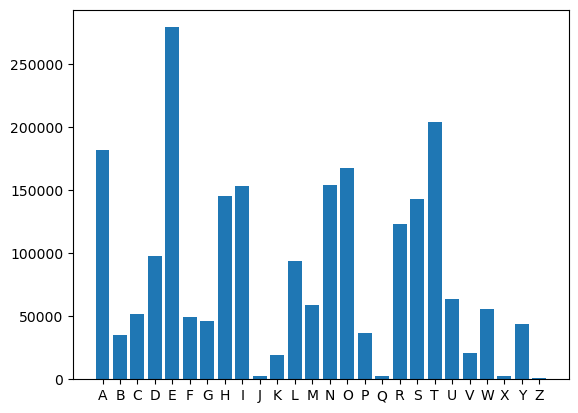

In [13]:
#### GET FREQUENCY OF LETTERS IN ENGLISH LANGUAGE, WRITE TO FILE IN DESCENDING ORDER ####
text = get_large_text()
counts = {chr(x):0 for x in range(65,91)}
text = text.upper()
for character in text:
    if character in counts:
        counts[character]+=1

letters = list(counts.keys())
appearances = list(counts.values())
plt.bar(range(len(counts)),appearances,tick_label=letters)

plt.show() #shows graph of letter frequencies 

descending_frequencies = open("decsending_frequent_letters.txt","w")
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1],reverse=True)) #sorts the dictionary by value
frequency = [x for x in sorted_counts] #creates an ordered list of the letters in decreasing frequency
descending_frequencies.write("".join(frequency))
descending_frequencies.close() #writes the most frequent letters in descending order to the file



In [14]:
##### CAESAR CYPHER BREAK VIA FREQUENCY ANALYSIS ####

def caesar_frequency_break():
    
    #DONT NEED TO RUN FREQUENCY ANALYSIS EVERY TIME, WRITE TO TEXT FILE
    file_name = find_file()
    
    encrypted_text = open(file_name,"r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to  
    
    frequent_letters = open("decsending_frequent_letters.txt","r")    
    frequency_list = list(frequent_letters.read()) #gets the list of the most frequent letters in descending order
    
  
    
    
    
    message_most_frequent = frequency_finder(cryptic)[0] #finds the most frequent letter in the encrypted message
    
    correctness = False 
    while correctness == False: #iterates until plaintext is found
        for i in range(0,len(frequency_list)):
            decrypted_message = []
            
            shift_value = ord(message_most_frequent) - ord(frequency_list[i]) 
            #finds the shift value with corresponding letter of frequency list 
            
            for character in cryptic: #iterates each character in the cryptic text
                if character.isalpha(): #checks if character is in alphabet

                    if character.isupper(): #checks if character is uppercase
                        offset = 65 #sets appropriate offset
                    else:
                        offset = 97

                    character_offset = ord(character)-offset #offsets character to be between 0 and 25

                    decrypted_message.append(chr((character_offset-shift_value)%26+offset))
                    #appends decrypted character to decrypted message list
            print("".join(decrypted_message))
            print("")
            x = input("Does this look like plaintext? Press enter if so, type anything else if not: ")
            if x == "":
                correctness = True
                print("")
                print("Plaintext written to decrypted_text.txt")
                break
            else:
                continue
    decrypted_text.write("".join(decrypted_message)) #writes the plaintext to decrypted_text
    decrypted_text.close()
    encrypted_text.close()
    frequent_letters.close() #closes the files
    return
    
    

In [15]:
#caesar_encrypt()
#caesar_frequency_break()

In [16]:
#### TURN VIGENERE KEY INTO NUMBERS ####
 ## SPLIT KEY FIRST, RETURN TUPLE OF SPLIT KEY
def key_to_tuple():
    key_file = open("_vigenere_key.txt","r") #opens the vigenere key file
    key = key_file.read() #reads the vigenere key to key

    num_of_splits = len(key)//64 #gets the quotient of the key length when dividing by 64 to find out our splits
    split_key = []
    for i in range(0,num_of_splits+1): #iterates through splits
        key_num_list = [] #creates a list for our number key
        for character in range(64*i,64*(i+1)): #iterates through all characters of that split
            if character == len(key): #makes sure not to go out of the range of the string
                break
            key_num_list.append(str(ord(key[character])))#appends the string value of the ASCII value of the character

        key_num_str = "".join(key_num_list) #turns the list into a long string
        key_num = int(key_num_str) #turns the string into an integer
        split_key.append(key_num)#applies the split key to the big list
  
    return tuple(split_key)

key_to_tuple()
# EVERY 2 DIGITS REPRESENTS ONE OF THE LETTERS OF OUR KEY

(838080738380868082678873716767,)

In [56]:
#### RSA KEY GENERATOR ####

def RSA_key_generator(bitlength=1024): #can take 128 numbers with Bitlength of 1024
    """This will generate RSA keys. This is a version of the private key.
    The output is ((PublicKey), PrivateExp, Factorisation).
    The PublicKey can be published, PrivateExp is needed to decrypt.
    Factorisation is not needed, but must be kept secret."""
    ## Generate two large primes.
    p = cryptography_functions.random_prime(bitlength)
    q = cryptography_functions.random_prime(bitlength)
    N = p*q
    
    ## Next, get phi and use it to get a public and private exponent.
    phi = (p-1)*(q-1)
    ## Choose encryption exponent e randomly between 1 and p and q.
    e = random.randint(1,min(p,q))
    ## It must be coprime to phi though. We use rejection sampling again:    
    while cryptography_functions.gcd(e,phi) > 1:
        e = random.randint(1,min(p,q))
    
    ## Finally, get d using 'pow'
    ## (the extended Euclid's algorithm could do this too).
    d = pow(e,-1,phi)
    
    ## Then return the keys.
    return ((N,e),d%phi,{p:1,q:1})

In [58]:
def RSA_encrypt(N,e):
    encrypted_key_list=[]
    vigi_key_list = list(key_to_tuple())
    for element in vigi_key_list:
        i=pow(element,e,N)
        encrypted_key_list.append(i)
    """Encrypt an integer 'message' using RSA with public key (N,e)."""
    return tuple(encrypted_key_list)

public_key,d,factors = RSA_key_generator()

cipher = RSA_encrypt(public_key[0],public_key[1])
print(cipher)


#attempt at changing it
def RSA_encrypt(N,e,KEY_plural):
    encrypted_key_list=[]
    _key_list = list(KEY_plural)
    for element in vigi_key_list:
        i=pow(element,e,N)
        encrypted_key_list.append(i)
    """Encrypt an integer 'message' using RSA with public key (N,e)."""
    return tuple(encrypted_key_list)

public_key,d,factors = RSA_key_generator()

cipher = RSA_encrypt(public_key[0],public_key[1], key_to_tuple())
print(cipher)tuple(encrypted_key_list)

public_key,d,factors = RSA_key_generator()

cipher = RSA_encrypt(public_key[0],public_key[1])
print(cipher)


NameError: name 'vigi_key_list' is not defined

In [19]:
def RSA_decrypt(encrypted_key,N,d):
    complete_key=[]
    decryption_list=list(encrypted_key)
    for element in decryption_list:
        j=pow(element,d,N)
        complete_key.append(str(j))
    """Decrypt an integer message using RSA with public key (N,e) and private key (d, fact)."""
    return "".join(complete_key)

received_int = RSA_decrypt(cipher,public_key[0],d)

print(received_int)

838080738380868082678873716767


In [20]:
print(len("8678868975786684757371837574908171717884807067706983788273708868826974767772666782677988658883838688676675696866747472838985868370657690667386787588827288708780667774898573727980806566908868878768727981807589887875757090697368737176658670788785678190906586"))

256


In [21]:

print(len("86788689757866847573718375749081717178848070677069837882737088688269747677726667826779886588838386886766756968667474728389858683"))

128


In [42]:
from random import randint
from random import sample
import string
from itertools import permutations

ALPH_1 = string.ascii_lowercase

# round? = The return value is an integer

# create bigrams:



fr = {'a': 0.0813382530968154, 'b': 0.015772428180238454, 'c': 0.02307211235643865, 'd': 0.04378202350586753, 'e': 0.12486207836182597, 'f': 0.022079076561585642, 'g': 0.020784064969467386, 'h': 0.06501369165412156, 'i': 0.06853376455715428, 'j': 0.00125078732595071, 'k': 0.00849105910416825, 'l': 0.04209882113294529, 'm': 0.026337113986929273, 'n': 0.06876203324414029, 'o': 0.0749226075342068, 'p': 0.01639692842369527, 'q': 0.0012807168798216735, 'r': 0.05524995644579847, 's': 0.06410999781112219, 't': 0.09143076668795984, 'u': 0.028544753617232275, 'v': 0.00937018391040789, 'w': 0.024949633474642522, 'x': 0.0013084128848962963, 'y': 0.019657016246833945, 'z': 0.0006017180457341452}

#all_bigrams = []
 #   for c in ALPH_1:
  #      for d in ALPH_1:
   #         all_bigrams.append(c + d)
    
encode_dict = dict()

def bigrams(fr):

    global encode_dict
    all_bigrams = ["".join(pair) for pair in permutations(ALPH_1, 2)]
  #  su = []
    
    for key in fr:
        
        freq = fr[key]
        
        bi_quantity = round(650*freq)
        if bi_quantity == 0:
            bi_quantity = 1
        if bi_quantity > 50:
            bi_quantity -= 1
      
        storage = sample(all_bigrams, bi_quantity)
        
        all_bigrams = [bigram for bigram in all_bigrams if bigram not in storage]
        encode_dict[key]=storage
       
    return encode_dict

print (bigrams(fr))

{'a': ['ls', 'is', 'ia', 'jt', 'ur', 'em', 'sr', 'lh', 'rz', 'hz', 'ar', 'yj', 'sv', 'xu', 'jy', 'ic', 'vo', 'sd', 'pz', 'kw', 'vs', 'ok', 'kb', 'cz', 'bd', 'up', 'iq', 'lb', 'vh', 'ad', 'ez', 'qe', 'xr', 'go', 'hv', 'cx', 'ul', 'fj', 'nb', 'bg', 'ry', 'mi', 'lu', 'pw', 'gv', 'vc', 'pm', 're', 'kh', 'vl', 'yi', 'bh'], 'b': ['sg', 'np', 'gh', 'ao', 'vu', 'wv', 'nz', 'le', 'ab', 'wn'], 'c': ['gw', 'zf', 'sa', 'rt', 'rb', 'rp', 'lw', 'an', 'ub', 'ow', 'kt', 'oy', 'pa', 'mv', 'vg'], 'd': ['jk', 'xj', 'jc', 'qd', 'zo', 'aq', 'uq', 'fm', 'pk', 'gt', 'av', 'lt', 'ud', 'tc', 'cp', 'in', 'xs', 'et', 'di', 'eq', 'fs', 'tm', 'ef', 'ni', 'vq', 'bp', 'wr', 'rh'], 'e': ['gf', 'xv', 'bv', 'ci', 'ae', 'ev', 'bf', 'vp', 'yb', 'og', 'xl', 'lq', 'ho', 'xy', 'sq', 'qx', 'ag', 'xe', 'ac', 'si', 'nj', 'yp', 'uz', 'gx', 'zi', 'ai', 'ed', 'kj', 'jq', 'zr', 'qm', 'hf', 'gy', 'xb', 'lo', 'tj', 'hx', 'tn', 'uf', 'qh', 'ne', 'kl', 'dh', 'tk', 'od', 'xc', 'fv', 'vf', 'sb', 'zm', 'zj', 'td', 'kg', 'hd', 'kx', 'dt',

In [45]:
# second part of question 4 below

import string
ALPH_1 = string.ascii_lowercase

def char_to_byte(char): 
    """
    Returns the 8 bit binary representation (padded with 
    leading zeros when necessary) of ord(char), i.e. of 
    the order of the input character char. 
    """
    byte_string = bin(ord(char))[2:]            # The order of char as a binary string 
    num_zeros = 8 - len(byte_string)            # The number of zeros needed to pad out byte_string
    byte_string = '0' * num_zeros + byte_string # Now pad out byte_string with num_zeros many zeros
                                                # to obtain the 8-bit binary representation
    return byte_string  


#global encode_dict
# replace this dectionary wiht the dictionary we've made of 2grams

def int_form(key1):
    two_grams = encode_dict[key1] 
    y = "".join(two_grams)
    list = []
    list.append(' 1')
    binary = [char_to_byte(char) for char in y]
    biny = "".join(binary)
    list.append(biny)
    return "".join(list)

key = []
Vig = str(key_to_tuple()[0])
key.append(Vig)
for key2 in ALPH_1:
    item = int_form(key2)
    key.append(item)

key_final = "".join(key)
    
#print(key_final)


In [46]:
def prep_for_RSA(string_input,segment_len):
    string= [string_input[i:i+segment_len]for i in range(0,len(string_input), segment_len)]
    if len(string) == 8:
        return string
    else:
        last_two = [string[7], string[8]]
        string.remove(string[8])
        string[7] = "".join(last_two)
        return string
    
eights = prep_for_RSA(key_final, len(key_final)//8)
print(eights)
#len(eights)

['838080738380868082678873716767 10110110001110011011010010111001101101001011000010110101001110100011101010111001001100101011011010111001101110010011011000110100001110010011110100110100001111010011000010111001001111001011010100111001101110110011110000111010101101010011110010110100101100011011101100110111101110011011001000111000001111010011010110111011101110110011100110110111101101011011010110110001001100011011110100110001001100100011101010111000001101001011100010110110001100010011101100110100001100001011001000110010101111010011100010110010101111000011100100110011101101111011010000111011001100011011110000111010101101100011001100110101001101110011000100110001001100111011100100111100101101101011010010110110001110101011100000111011101100111011101100111011001100011011100000110110101110010011001010110101101101000011101100110110001111001011010010110001001101000 1011100110110011101101110011100000110011101101000011000010110111101110110011101010111011101110110011011100111101001101100011001010110

In [ ]:
 we need to rsa encrypt all these integers and send them in a list called the public key
    we also need to send the message which is encrypted wiht the 2grams and vif=g
    and send it

In [55]:
#rsa encryption of our key



encode_dict['a'][randint.range(len(encode_dict['a'])-1)]



AttributeError: 'function' object has no attribute 'range'

In [ ]:
def prep_for_RSA(string_input,num_segments):
    split_points=sorted(random.sample(range(1,len(text)),num_segments-1))
    segments=[text[i:j]for i,j in zip([0]+split_points,split_points+[len(text)])]
    return segments
print (prep_for_RSA(key_final,8))